<a href="https://colab.research.google.com/github/jumbokh/ML-Class/blob/main/notebooks/4_4_Tree_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 作業
1. 請用鳶尾花的資料，並用決策樹來做預測，深度設為4。
    * 請分別算出訓練集和測試集的預測結果。
    * 請繪出決策樹的判斷圖形。

訓練集預測結果 0.98
測試集預測結果 0.98

     預測1  預測2  預測3
實際1   19    0    0
實際2    0   15    0
實際3    0    1   15

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



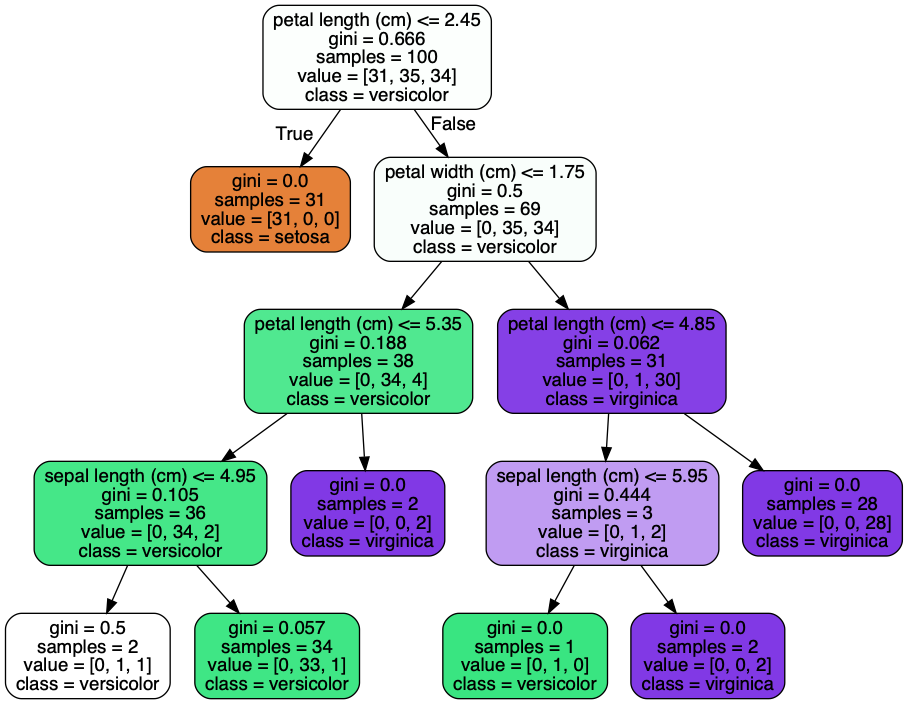

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# plt.rcParams['font.sans-serif'] = ['DFKai-sb'] 
# plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = iris['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.33, random_state=42)
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
print('訓練集預測結果', tree.score(X_train, y_train))
print('測試集預測結果', tree.score(X_test, y_test))
print()
cm = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm, index=['實際1', '實際2','實際3'], columns=['預測1', '預測2','預測3']))
print()
print(classification_report(y_test, y_pred))

from sklearn.tree import export_graphviz
import pydot 
from IPython.display import Image  
# features變數存放所有欄位名稱
features = X.columns
# class_names變數存放目標值表呈現的文字意義
class_names = ['setosa', 'versicolor', 'virginica']
# export_graphviz的第一個參數是決策樹模型的預測結果
# max_depth=3可設定決策樹呈現的深度，其餘參數讀者可自己測試
dot_data = export_graphviz(
    tree, 
    out_file=None,
    feature_names=features,
    class_names = class_names,
    proportion = False,
    max_depth=5,
    filled=True,
    rounded=True
)
graph = pydot.graph_from_dot_data(dot_data)  
Image(graph[0].create_png())